# Import necessary packages

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data and preprocessing

In [132]:
df = pd.read_csv('../../Datasets/penguins.csv')
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [133]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [134]:
df['species'].value_counts()
df['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

# Split X and Y

In [135]:
X = df.drop(columns=['sex', 'species', 'island'], axis=1)
Y = df['sex']
pd.set_option('future.no_silent_downcasting', True)

Y = Y.replace({'male': 1, 'female': 0}).astype(float)

# Visualize

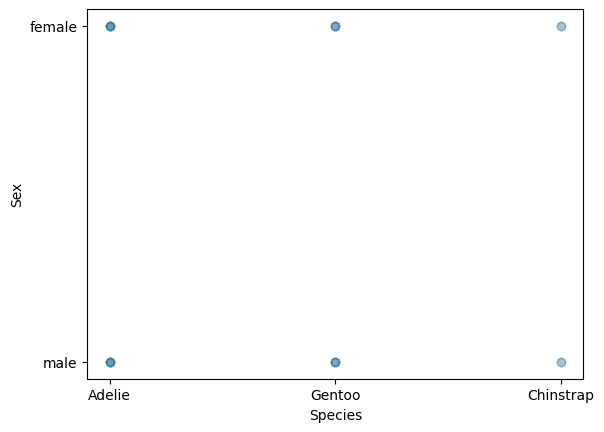

In [136]:
plt.scatter(x=df['species'], y=df['sex'], alpha=0.01)
plt.xlabel('Species')
plt.ylabel('Sex')
plt.show()

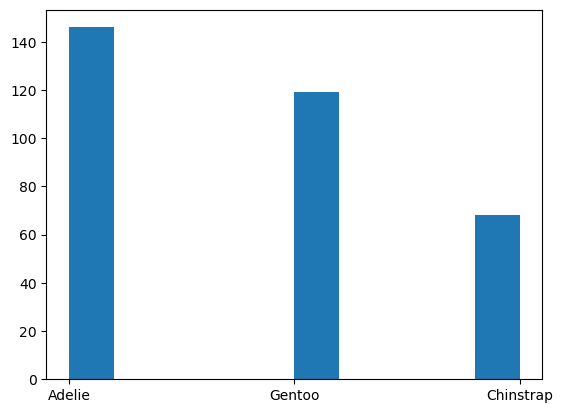

In [137]:
plt.hist(df['species'])
plt.show()

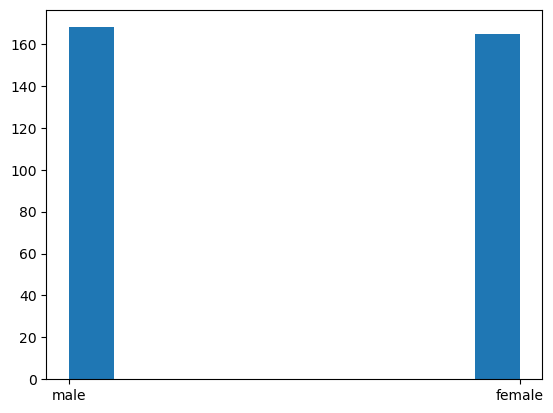

In [138]:
plt.hist(df['sex'])
plt.show()

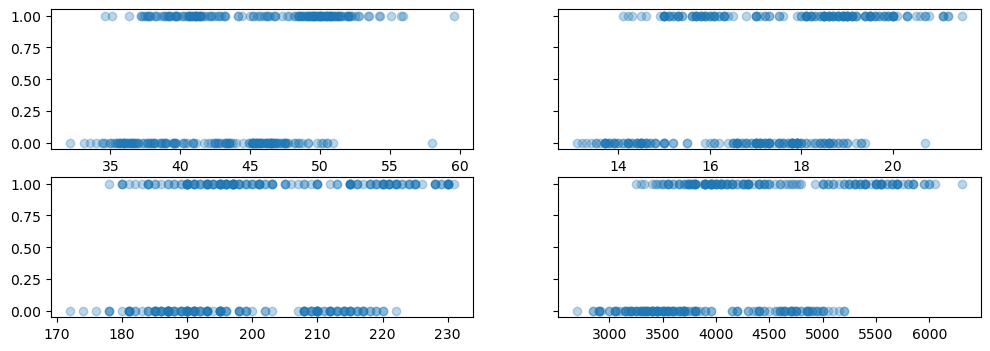

In [139]:
fig, ax = plt.subplots(2, 2, figsize=(12,4), sharey=True)
features = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
idx = 0
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].scatter(X[features[idx]], Y, alpha=0.3)
        idx += 1
plt.show()

# Split train test

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
X_test.shape

(34, 4)

# Train model

In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Model evaluation

In [142]:
from sklearn.metrics import accuracy_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_accuracy = accuracy_score(train_pred, Y_train)
test_accuracy = accuracy_score(test_pred, Y_test)
print(f'accuracy on train data: {train_accuracy}')
print(f'accuracy on test data: {test_accuracy}')

accuracy on train data: 0.9096989966555183
accuracy on test data: 0.8823529411764706
